In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Function to extract Title of review
def get_title(soup):

    try:
        title_string = soup.find("a", attrs={"data-hook":'review-title'}).span.text.strip()
    except AttributeError:
        title_string = ""
    return title_string

# Function to extract name of customer
def get_name(soup):
    try:
        name = soup.find("div", attrs={'class':'a-row a-spacing-none'}).find('span', {'class': 'a-profile-name'}).text
    except AttributeError:
        name = ""
    return name

# Function to extract Product Rating
def get_rating(soup):
    try:
        rating = soup.find("i", attrs={'data-hook':'review-star-rating'}).string.strip()
    except:
        rating = ""	
    return rating

# Function to extract Reviews
def get_review(soup):
    try:
        review = soup.find("div", attrs={'class':'reviewText'}).span.text
    except AttributeError:
        review = ""	
    return review

# define a function to calculate the sentiment polarity using TextBlob
def get_sentiment(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity


In [4]:

if __name__ == '__main__':
  HEADERS = ({'User-Agent':'', 'Accept-Language': 'en-US, en;q=0.5'})
  new_webpage = requests.get("https://www.amazon.com/Apple-iPhone-512GB-Space-Black/dp/B0BN93JTWW/ref=sr_1_1?crid=2XJ5LNJ2NJ8LS&keywords=iphone+14+pro&qid=1679312726&sprefix=iphone+14+pro%2Caps%2C118&sr=8-1", headers=HEADERS)
  d = {"name":[], "title":[], "rating":[], "review":[], 'polarity':[]}
  new_soup = BeautifulSoup(new_webpage.content, "html.parser")
  # Function calls to display all necessary product information
  reviews = new_soup.find("div", attrs={'id':'cm-cr-dp-review-list'})
  for i in reviews:
    d['name'].append(get_name(i))
    d['title'].append(get_title(i))
    d['rating'].append(get_rating(i))
    d['review'].append(get_review(i))
  d['polarity'] = [get_sentiment(review) for review in d['review']]
  amazon_df = pd.DataFrame.from_dict(d)
  amazon_df['title'].replace('', np.nan, inplace=True)
  amazon_df = amazon_df.dropna(subset=['title'])
  amazon_df.to_csv("amazon_data.csv", header=True, index=False)

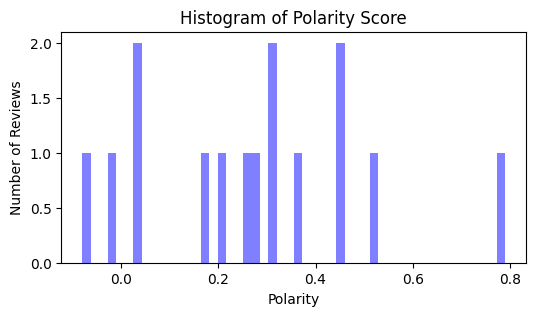

In [10]:

num_bins = 50
plt.figure(figsize=(6,3))
n, bins, patches = plt.hist(amazon_df.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show()